# Auto MPG Prediction through Deep Learning

# Introduction

<b>Problem Statement</b>

The Auto MPG sample data set is a collection of 398 automobile records from 1970 to 1982. It contains attributes like car name, MPG, number of cylinders, horsepower and weight. Here, we will try to predict the miles-per-gallon (MPG) of car through deep learning models. I have retrieved the dataset AUTO MPG from the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets.php)

# Methodology

<b>Here I will use the deep learning work process for this problem. I will start importing libraries, getting data, preparing data and preprocess it which includes handling null values, handling categorical features and normalizing the dataset, analysis of data, building a baseline model, then build big models than the baseline model, regularizing model and tune the hyperparameters, Evaluate the model, Getting the Results and plotting the errors, saving the model, reloading the model to test and finally the conclusion.</b>

<b> I did not use accuracy because it is a regression problem. In regression problems, we tend to use error to check the model's performance. </b>

# Import Libraries

<b>Importing basic libraries such as numpy, pandas, matplotlib, seaborn and tensorflow.</b>

In [26]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import plot_model
np.set_printoptions(precision= 3, suppress= True)
%matplotlib inline

# Getting the Data

In [27]:
url = 'auto-mpg.data'
column_names = ['MPG', 'Clyinders','Displacement','Horsepower', 'Weight', 'Acceleration', 'Model Year','Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset= raw_dataset.copy()

<b>Checking the head of dataset </b>

In [28]:
dataset.head()

,MPG,Clyinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Data Preprocessing

# Handling Null Values

<b>Finding, is there any null value in columns of dataset</b>

In [29]:
dataset.isna().sum()

MPG             0
Clyinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

<b>Dropping the null values from dataset</b>

In [30]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Clyinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

# Categorical Features

<b>Mapping the categories of the Origin column of dataset to countries and get dummies from pandas </b>

In [31]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2 : 'Europe', 3 : 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Clyinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


# Separating Train, Validation and Test Data

<b>Separating training, validation and test dataset using some fraction value</b>

In [32]:
train_dataset = dataset.sample(frac= 0.6, random_state= 0)
test_val = dataset.drop(train_dataset.index)

val_dataset = test_val.sample(frac= 0.5, random_state= 0)
test_dataset = test_val.drop(val_dataset.index)

In [33]:
train_dataset.shape


(235, 10)

In [34]:
val_dataset.shape


(78, 10)

In [35]:
test_dataset.shape

(79, 10)

# Dataset Analysis

# Correlation Among Features

<b>Plotting the training dataset to check the correlation among features</b>

In [36]:
correlations = train_dataset[['MPG', 'Clyinders','Displacement','Weight', "Horsepower"]].corr()

<AxesSubplot:>

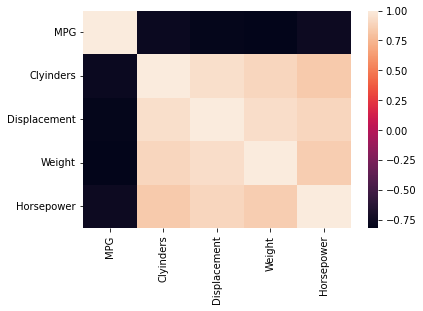

In [37]:
sns.heatmap(correlations)

<b>We didn't see any particular correlation among featues through seaborn heatmap. Now, let's check the correlation through seaborn pairplot.</b>

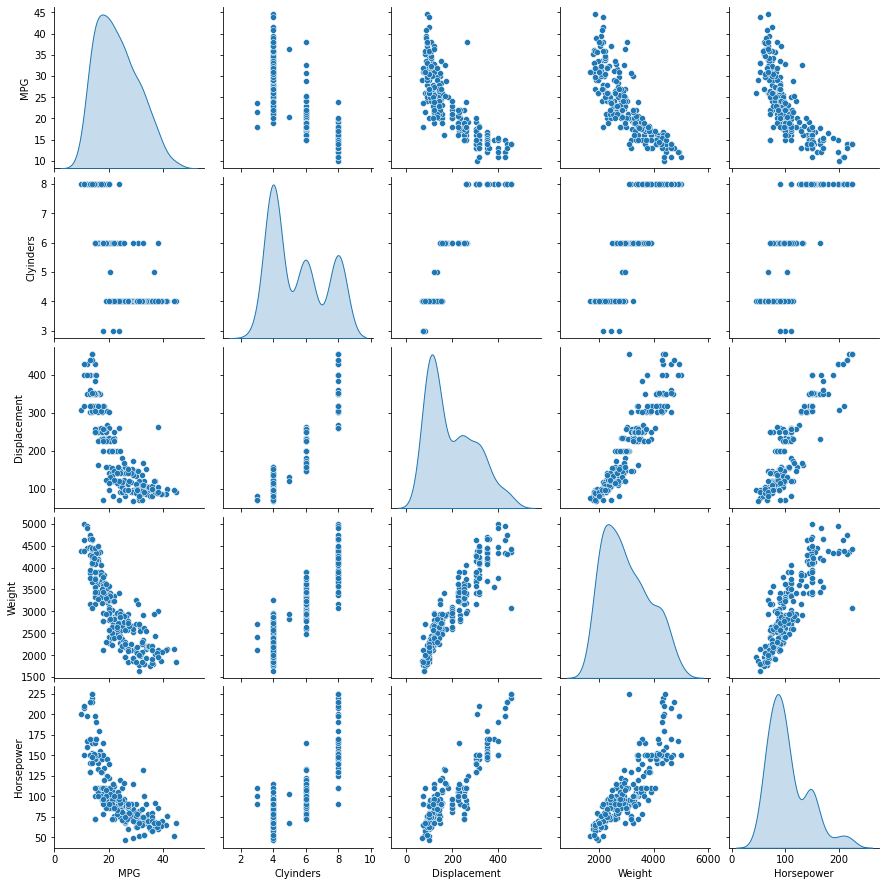

In [38]:
sns.pairplot(train_dataset[['MPG', 'Clyinders','Displacement','Weight', "Horsepower"]], diag_kind = 'kde', palette = "Paired")

<b>Above we can see clear correlation among features through pairplot. </b>

<b>Describing the training dataset</b>

In [39]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,235.0,23.128085,7.623332,10.0,17.0,22.0,28.6,44.6
Clyinders,235.0,5.519149,1.687895,3.0,4.0,6.0,8.0,8.0
Displacement,235.0,196.434043,103.094715,68.0,107.0,155.0,261.0,455.0
Horsepower,235.0,104.957447,37.989291,46.0,76.0,95.0,129.0,225.0
Weight,235.0,2991.165957,839.469059,1649.0,2264.5,2830.0,3609.0,4997.0
Acceleration,235.0,15.529362,2.600039,8.5,14.0,15.5,17.2,24.6
Model Year,235.0,75.910638,3.650971,70.0,73.0,76.0,79.0,82.0
Europe,235.0,0.157447,0.364999,0.0,0.0,0.0,0.0,1.0
Japan,235.0,0.200000,0.400854,0.0,0.0,0.0,0.0,1.0
USA,235.0,0.642553,0.480271,0.0,0.0,1.0,1.0,1.0


<b>Above we can see that there is a lot of variation among mean and std values of features which can cause an effect on the learning process of our model. So, we have to normalize our features so that our model can learn better and perform well. Let's separate the features and labels of our train and test dataset and then perform normalization on train features.</b>

# Separating Features and Labels

<b>Separating out the train, validation & test features and label</b>

In [40]:
train_features = train_dataset.copy()
val_features = val_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
val_labels = val_features.pop('MPG')
test_labels = test_features.pop('MPG')


<b>Making an object of normalization and putting it on train featues</b>

# Normalization

<b>So, we are using tensorflow.keras.layers.experimental.preprocessing function to perform normalization on train features.</b>

In [41]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

<b>Printing and chehcking the mean of our normalized features.</b>

In [42]:
print(normalizer.mean.numpy())

[[   5.519  196.434  104.957 2991.166   15.529   75.911    0.157    0.2
     0.643]]


<b>Here, we are comparing the features of our first example before normalization and after normalization. We can see the difference among feature values before and after normalization.</b>

In [43]:
first = np.array(train_features[:1])
with np.printoptions(precision = 2, suppress = True):
  print('First Example is: ',first)
  print()
  print('Normalized: ', normalizer(first).numpy())


First Example is:  [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized:  [[-0.9  -1.03 -0.79 -1.03 -0.4  -0.52 -0.43 -0.5   0.75]]


# Models Building

# Baseline Model

<b>Defining a baseline model with normalizer on all feature of train dataset and with one dense layer with one unit as output because we want to predict a continous value due to regression problem.</b>

In [44]:
baseline_model = tf.keras.models.Sequential([
                                           normalizer,
                                           layers.Dense(1)
])

baseline_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss = 'mean_absolute_error')

<b>See the Summary of baseline model and number of parameters we have to teach.</b>

In [45]:
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


<b>Training and fitting the baseline model.</b>

In [46]:
%%time
history = baseline_model.fit(train_features, train_labels, epochs= 100, verbose=0, validation_data= (val_features, val_labels))

Wall time: 3.91 s


# Results of Baseline Model

<b>Plotting train loss and val loss of baseline model on same plot.</b>

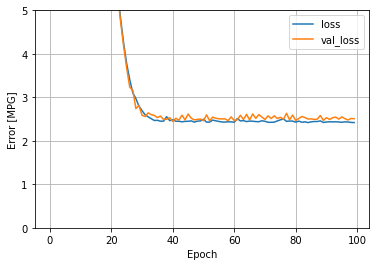

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 5])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<b>Making a list to store accuracies of different model.</b>

In [48]:
test_result  ={}

<b>Appending the results of baseline model in test_result list.</b>

In [49]:
test_result['baseline_model'] = baseline_model.evaluate(test_features, test_labels, verbose= 0)
test_result

{'baseline_model': 2.5683770179748535}

# Model With 3 Layers

<b>Defining a sequential model with 2 more layers than baseline model having activation function relu and compiling that model using Adam optimizer and mean absolute error.</b>

In [50]:
model = tf.keras.models.Sequential([
                                     normalizer,
                                     layers.Dense(64, activation= 'relu'),
                                     layers.Dense(64, activation='relu'),
                                     layers.Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss=  'mean_absolute_error')
 

<b>See the Summary of model with 3 layers and number of parameters we have to teach.</b>

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                640       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


<b>Fitting the model with 3 layers.</b>

In [52]:
%%time
history1 = model.fit(train_features, train_labels, epochs= 100, verbose=0, validation_data= (val_features, val_labels))

Wall time: 4.69 s


# Results of Model with 3 Layers

<b>Plotting train loss and val loss of model with 3 layers on same plot.</b>

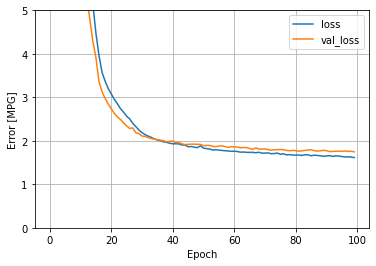

In [53]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.ylim([0, 5])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<b>Plotting a scatter plot of acutal test labels across predictions we made through our trained model. We can see below that our predicted and true labels are almost near to each other.</b>

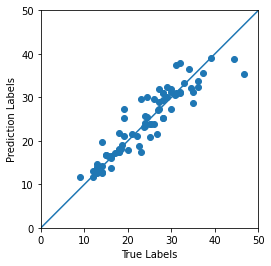

In [54]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Labels')
plt.ylabel('Prediction Labels')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

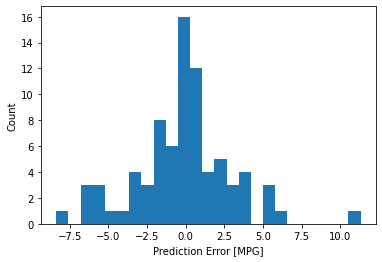

In [55]:
error = test_labels - test_predictions
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

<b>Appending the results of model in test results list.</b>

In [56]:
test_result['model_with_3_layers'] = model.evaluate(test_features, test_labels, verbose=0)
test_result

{'baseline_model': 2.5683770179748535,
 'model_with_3_layers': 2.238417625427246}

<b>Getting a DataFrame of mean absolute errors of all the models from test results list</b>

In [57]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
baseline_model,2.568377
model_with_3_layers,2.238418


# Model with 5 Layers

<b>Defining a sequential model with 5 more layers having units 16, 32, 64, 128, 10 respectively than baseline model having activation function relu and compiling that model using Adam optimizer and mean absolute error.</b>

In [58]:
model2 = tf.keras.models.Sequential([
                                     normalizer,
                                     layers.Dense(16, activation= 'relu'),
                                     layers.Dense(32, activation='relu'),
                                     layers.Dense(64, activation='relu'),
                                     layers.Dense(128, activation='relu'),
                                     layers.Dense(10, activation='relu'),
                                     layers.Dense(1)
])

model2.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss=  'mean_absolute_error')

<b>See the Summary of model with 5 layers and number of parameters we have to teach.</b>

In [59]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 16)                160       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

<b>Fitting the model with 5 layers.</b>

In [60]:
%%time
history2 = model2.fit(train_features, train_labels, epochs= 100, verbose=0, validation_data= (val_features, val_labels))

Wall time: 7.76 s


# Results of Model with 5 Layers

<b>Plotting train loss and val loss of model with 5 layers on same plot.</b>

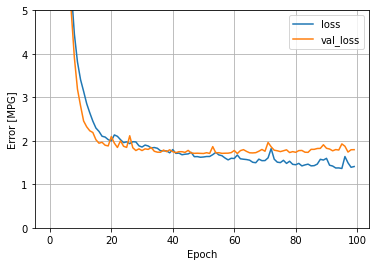

In [61]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.ylim([0, 5])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<b>Appending the results of model in test results list.</b>

In [62]:
test_result['model_with_5_layers'] = model2.evaluate(test_features, test_labels, verbose=0)
test_result

{'baseline_model': 2.5683770179748535,
 'model_with_3_layers': 2.238417625427246,
 'model_with_5_layers': 2.248528003692627}

# Model with 3 Layers and Regularization

<b>Defining a sequential model with 3 more layers with units 64, 64 and regularization with dropout using dropout rate 0.2 than baseline model having activation function relu and compiling that model using Adam optimizer and mean absolute error.</b>

In [63]:
model_regularized = tf.keras.models.Sequential([
                                     normalizer,
                                     layers.Dense(64, activation= 'relu'),
                                     layers.Dropout(0.2),
                                     layers.Dense(64, activation='relu'),
                                     layers.Dropout(0.2),
                                     layers.Dense(1)
])

model_regularized.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss=  'mean_absolute_error')

<b>See the Summary of regularized model and number of parameters we have to teach.</b>

In [64]:
model_regularized.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                      

<b>Fitting the regularized model.</b>

In [65]:
%%time
history3 = model_regularized.fit(train_features, train_labels, epochs= 1000, verbose=0, validation_data= (val_features, val_labels))

Wall time: 1min 3s


# Results of Regularized Model

<b>Plotting train loss and val loss of regularized model on same plot.</b>

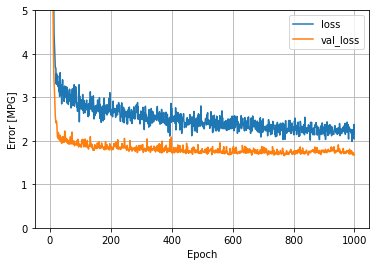

In [66]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.ylim([0, 5])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<b>Plotting a scatter plot of acutal test labels across predictions we made through our trained regularized model. We can see below that our predicted and true labels are almost near to each other and our regularized model is properly converged which means that now model is ready to use for predictions.</b>

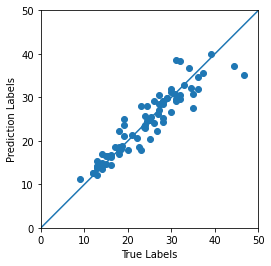

In [67]:
test_predictions = model_regularized.predict(test_features).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Labels')
plt.ylabel('Prediction Labels')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<b>Appending the results of model in test results list.</b>

In [68]:
test_result['model_regularized'] = model_regularized.evaluate(test_features, test_labels, verbose=0)
test_result

{'baseline_model': 2.5683770179748535,
 'model_with_3_layers': 2.238417625427246,
 'model_with_5_layers': 2.248528003692627,
 'model_regularized': 2.1187825202941895}

<b>Getting a DataFrame of mean absolute errors of all the models from test results list</b>

In [69]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
baseline_model,2.568377
model_with_3_layers,2.238418
model_with_5_layers,2.248528
model_regularized,2.118783


# Saving the Regularized Model

<b>Saving the model because it gave us good results instead of others.</b>

In [70]:
model_regularized.save('model_regularized')

INFO:tensorflow:Assets written to: model_regularized\assets


# Reload Model to Test

<b>Reloading the saved regularized model by calling tensorflow function named load_model "tf.keras.models.load_model" and evaluate the loaded model on test data to see whether we saved and loaded the right model.</b>

In [71]:
reloader = tf.keras.models.load_model('model_regularized')
reloader.evaluate(test_features, test_labels, verbose = 0)

2.1187825202941895

<b>You can see below that mean absolute error of regularized model and reloaded model is same which means that we saved the right regularized model and loaded it.</b>

In [72]:
test_result['reloader'] = reloader.evaluate(test_features, test_labels, verbose = 0)
test_result

{'baseline_model': 2.5683770179748535,
 'model_with_3_layers': 2.238417625427246,
 'model_with_5_layers': 2.248528003692627,
 'model_regularized': 2.1187825202941895,
 'reloader': 2.1187825202941895}

# Conclusion

<b>Here are the final results which is mean absolute error of all the models we trained on our training features and tested on test features.</b>

In [73]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
baseline_model,2.568377
model_with_3_layers,2.238418
model_with_5_layers,2.248528
model_regularized,2.118783
reloader,2.118783


In [74]:
pd.DataFrame(test_result, index = ['Mean Absolute Error [MPG]'])

,baseline_model,model_with_3_layers,model_with_5_layers,model_regularized,reloader
Mean Absolute Error [MPG],2.568377,2.238418,2.248528,2.118783,2.118783


<b>In Baseline Model, we got results that are scattered around because the model went into underfitting due to less layers with small number of units. Afterwards, in the next model, which is model with 3 layers, we increased the number of layers to 3 with increasing pattern of units. We got relatively better results than the baseline model. Further increasing the model complexity with more layers with increasing units resulted in overfitting and the results were much worse than the model with 3 layers because our problem and dataset was not so much complex, and so we had to use our model with 3 layers and introducing regularization in the model with three layers. So in the next and final model, we introduced regularization with dropout and fine tune the model. In conclusion, we got good results, also tested on test data which is not seen by model before and got good results on test data which means that now our model is ready!</b>